In [2]:
5.

5.0

In [3]:
# Using Zachary’s Karate club network data with NetworkX in Python perform following tasks:
# i. Visualize the network using matplotlib
# ii. Visualizing Important Nodes in the Graph
# iii. Perform spectral clustering:
# The spectral clustering algorithm is utilized to partition graphs in K groups based on
# their connectivity. The steps involved in spectral clustering include:

# 1. Pre-processing: Constructing a Laplacian Matrix of the Graph. The Laplacian
# Matrix is a difference between Adjacency Matrix and the Diagonal Matrix. L = D
# — A.
# 2. Decomposition — Compute eigenvalues and eigenvectors of the Laplacian Matrix,
# following which we need to map each point to a lower-dimensional representation.
# 3. K Means Algorithm — Create groups of clusters using the above data.

In [4]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import collections
# %matplotlib inline

In [5]:
# G = nx.karate_club_graph()

In [6]:
# nx.draw(G, with_labels = True)

In [7]:
# def draw(G, pos, measures, measure_name):
#     nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,node_color=list(measures.values()),nodelist=measures.keys())
#     nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
#     labels = nx.draw_networkx_labels(G, pos)
#     edges = nx.draw_networkx_edges(G, pos)
#     plt.title(measure_name)
#     plt.colorbar(nodes)
#     plt.axis()
#     plt.show()

In [8]:
# pos = nx.spring_layout(G, seed=675)

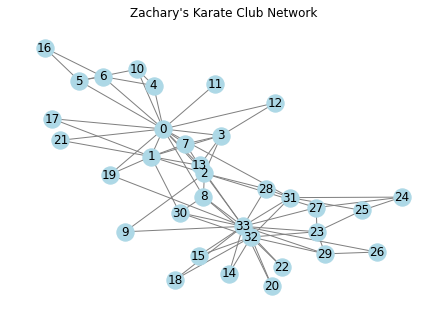

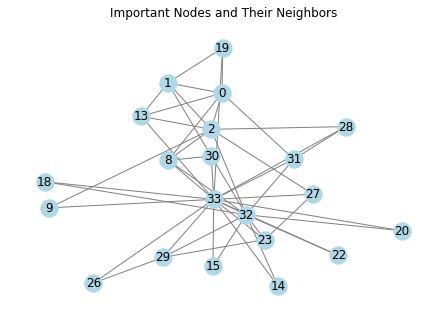

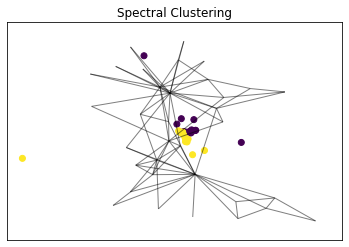

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

# Load the Karate club network data
G = nx.karate_club_graph()

# i. Visualize the network using matplotlib
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Zachary's Karate Club Network")
plt.show()

# ii. Visualizing Important Nodes in the Graph
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Take the top 5 nodes with highest degree centrality
important_nodes = sorted_nodes[:5]

# Create a subgraph with the important nodes and their neighbors
subgraph = G.subgraph(important_nodes + list(G.neighbors(important_nodes[0])))

# Visualize the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Important Nodes and Their Neighbors")
plt.show()

# iii. Perform spectral clustering
# Pre-processing: Constructing the Laplacian Matrix
adjacency_matrix = nx.to_numpy_array(G)
n = len(G.nodes)
degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
laplacian_matrix = degree_matrix - adjacency_matrix

# Decomposition: Compute eigenvalues and eigenvectors of the Laplacian Matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
embedding = eigenvectors[:, 1:3]  # Map each point to a 2D representation

# K Means Algorithm: Create groups of clusters
k = 2  # Number of clusters
spectral_clustering = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
labels = spectral_clustering.fit_predict(embedding)

# Visualize the clusters
pos = nx.spring_layout(G)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Spectral Clustering")
plt.show()